In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [3]:
data = pd.read_csv("./data/winequality-red.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
data.shape

(1599, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


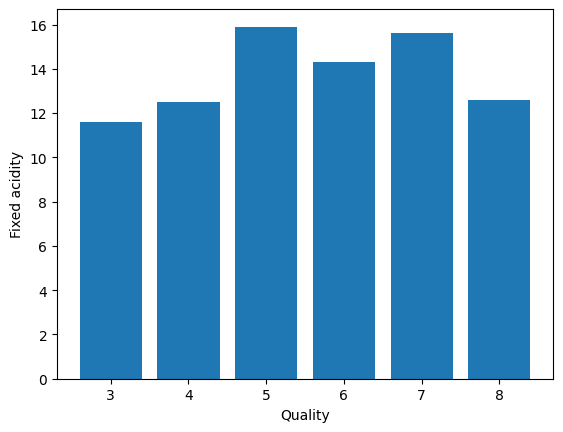

In [10]:
plt.bar(data["quality"], data["fixed acidity"])
plt.xlabel("Quality")
plt.ylabel("Fixed acidity")
plt.show()

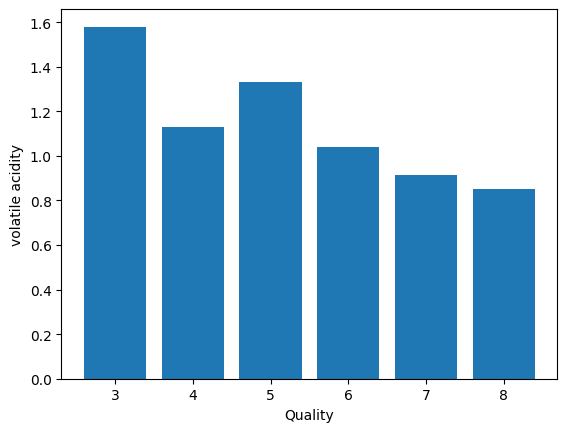

In [11]:
plt.bar(data["quality"], data["volatile acidity"])
plt.xlabel("Quality")
plt.ylabel("volatile acidity")
plt.show()

In [12]:
# when the volatile acidity increase the quality decrease 
# inversely proportional

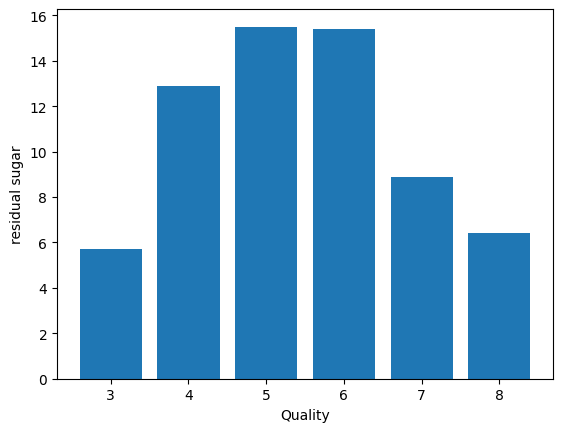

In [13]:
plt.bar(data["quality"], data["residual sugar"])
plt.xlabel("Quality")
plt.ylabel("residual sugar")
plt.show()

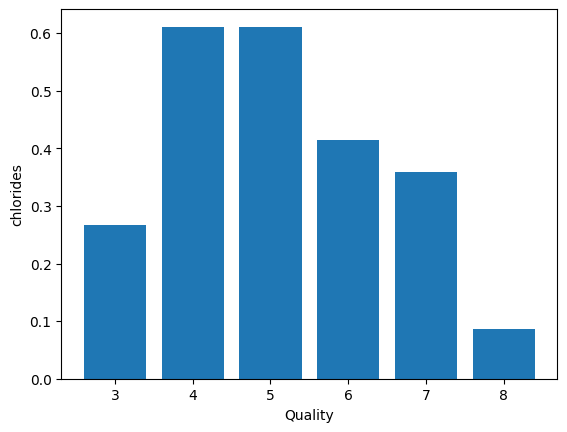

In [14]:
plt.bar(data["quality"], data["chlorides"])
plt.xlabel("Quality")
plt.ylabel("chlorides")
plt.show()

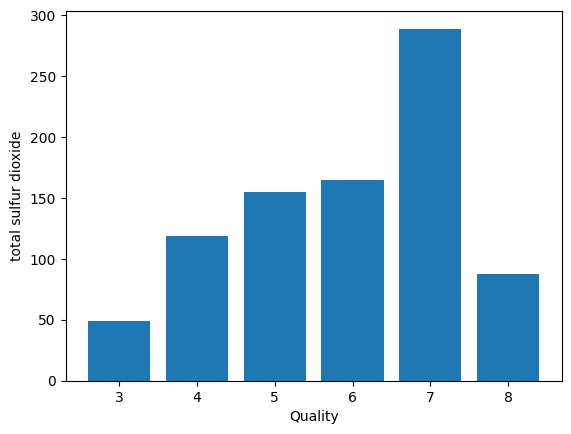

In [15]:
plt.bar(data["quality"], data["total sulfur dioxide"])
plt.xlabel("Quality")
plt.ylabel("total sulfur dioxide")
plt.show()

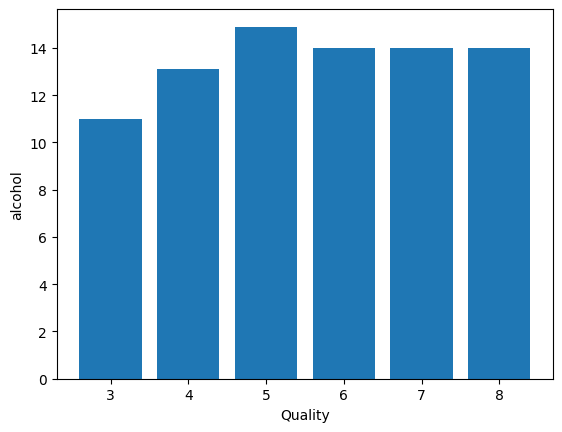

In [16]:
plt.bar(data["quality"], data["alcohol"])
plt.xlabel("Quality")
plt.ylabel("alcohol")
plt.show()

<Axes: >

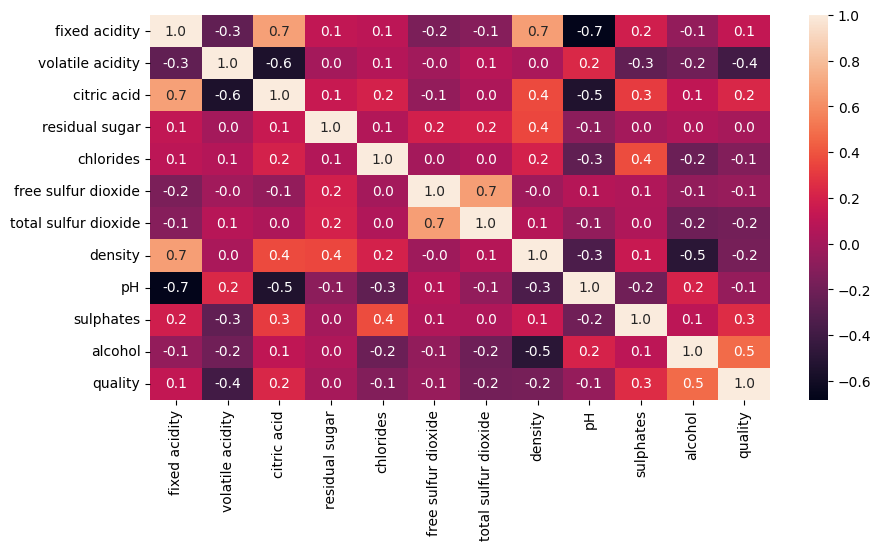

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, fmt="0.1f")

Binarization of the target variable

In [18]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [19]:
data["quality"] = [1 if x>=7 else 0 for x in data["quality"]]

In [20]:
data["quality"].unique()

array([0, 1])

In [21]:
data["quality"].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [22]:
# this is an Imbalanced data 

In [23]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [24]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [25]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [26]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [27]:
y_res.value_counts()

quality
0    1382
1    1382
Name: count, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

Standardization

In [29]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

PCA

In [30]:
pca = PCA(n_components=0.9) # i want 90% of my info

In [31]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [32]:
sum(pca.explained_variance_ratio_)
# this is the 90% of our dataset

np.float64(0.9192149599986279)

In [33]:
pca.explained_variance_ratio_

array([0.2915964 , 0.18796058, 0.14203143, 0.10442029, 0.08630201,
       0.0600456 , 0.04685865])

In [34]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred1 = log.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred1)

0.8155515370705244

In [37]:
precision_score(y_test, y_pred1)

0.7721088435374149

In [38]:
recall_score(y_test, y_pred1)

0.8664122137404581

In [39]:
f1_score(y_test, y_pred1)

0.8165467625899281

SVC

In [40]:
svm = svm.SVC()

In [41]:
svm.fit(X_train, y_train)

SVC()

In [42]:
y_pred2 = svm.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred2)

0.8661844484629295

In [44]:
precision_score(y_test, y_pred2)

0.8175675675675675

In [45]:
recall_score(y_test, y_pred2)

0.9236641221374046

In [46]:
f1_score(y_test, y_pred2)

0.8673835125448028

KNeighbors Classifier

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred3 = knn.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred3)

0.8679927667269439

In [51]:
precision_score(y_test, y_pred3)

0.794392523364486

In [52]:
recall_score(y_test, y_pred3)

0.9732824427480916

In [53]:
f1_score(y_test, y_pred3)

0.8747855917667239

Decision Tree Classifier

In [54]:
dt = DecisionTreeClassifier()

In [55]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred4 = dt.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred4)

0.8571428571428571

In [58]:
precision_score(y_test, y_pred4)

0.8351648351648352

In [59]:
f1_score(y_test, y_pred4)

0.8523364485981308

In [60]:
recall_score(y_test, y_pred4)

0.8702290076335878

Random Forest Classifier

In [61]:
rf = RandomForestClassifier()

In [62]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
y_pred5 = rf.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred5)

0.9077757685352622

In [65]:
precision_score(y_test, y_pred5)

0.867595818815331

In [66]:
f1_score(y_test, y_pred5)

0.907103825136612

In [67]:
recall_score(y_test, y_pred5)

0.950381679389313

Gradiant Boosting Classifier

In [68]:
gbc = GradientBoostingClassifier()

In [69]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [70]:
y_pred6 = gbc.predict(X_test)

In [71]:
accuracy_score(y_test, y_pred6)

0.8589511754068716

In [72]:
precision_score(y_test, y_pred6)

0.8194444444444444

In [73]:
f1_score(y_test, y_pred6)

0.8581818181818182

In [74]:
recall_score(y_test, y_pred6)

0.9007633587786259

In [75]:
final_data =pd.DataFrame({"Models": ["LR", "SVC", "KNN", "DT", "RF", "GBC"],
              "ACC": [accuracy_score(y_test, y_pred1) *100,
                      accuracy_score(y_test, y_pred2) *100,
                        accuracy_score(y_test, y_pred3) *100,
                        accuracy_score(y_test, y_pred4) *100,
                         accuracy_score(y_test, y_pred5) *100,
                          accuracy_score(y_test, y_pred6) *100, ]})

In [76]:
final_data

,Models,ACC
0,LR,81.555154
1,SVC,86.618445
2,KNN,86.799277
3,DT,85.714286
4,RF,90.777577
5,GBC,85.895118


<Axes: xlabel='Models', ylabel='ACC'>

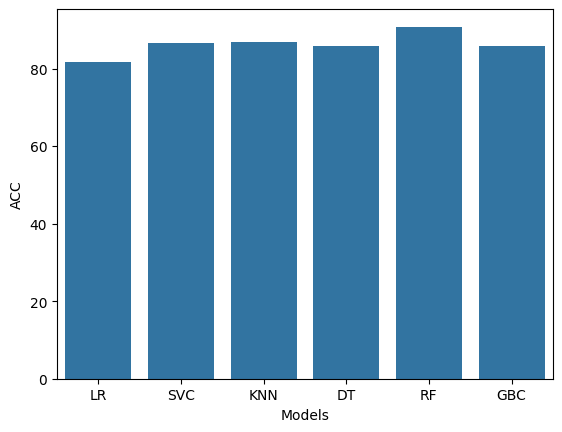

In [77]:
sns.barplot(x="Models", y="ACC", data=final_data)

In [78]:
# Random Forest Classifier is the best performing

In [79]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [80]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [81]:
X = st.fit_transform(X_res)

In [82]:
X = pca.fit_transform(X)

In [83]:
rf.fit(X, y_res)

RandomForestClassifier()

In [84]:
joblib.dump(rf, "wine_quality_prediction")

['wine_quality_prediction']

In [85]:
model = joblib.load("wine_quality_prediction")

In [86]:
new_data = pd.DataFrame({
    'fixed acidity' : 7.3,
    'volatile acidity' : 0.65,
    'citric acid': 0.00,
    'residual sugar': 1.2,
    'chlorides': 0.065,
    'free sulfur dioxide': 15.0,
    'total sulfur dioxide': 21.0,
    'density':0.9946,
    'pH':3.39,
    'sulphates':0.47,
    'alcohol':10.0,

}, index=[0])

In [87]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [88]:
test = pca.transform(st.transform(new_data))

In [89]:
p = model.predict(test)

In [90]:
p

array([1])

In [91]:
if p[0] == 1:
    print("Good quality wine")
else:
    print("Bad quality wine")

Good quality wine


In [92]:
from tkinter import *

In [93]:
def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    model = joblib.load("wine_quality_prediction")
    result = model.predict(pca.transform(st.transform([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11]])))
    if (result[0] == 1):
        result = "Wine Quality is good"
    else:
        result = "Wine Quality is bad"
    Label(master, text="Quality").grid(row=12)
    Label(master,text=result).grid(row=13)

In [94]:
master = Tk()
master.title("Wine Quality")
label = Label(master, text="Wine Quality Prediction", bg="black", fg="white").grid(row=0,columnspan=2)
Label(master,text="fixed acidity").grid(row=1)
Label(master,text="volatile acidity").grid(row=2)
Label(master,text="citric acid").grid(row=3)
Label(master,text="residual sugar").grid(row=4)
Label(master,text="chlorides").grid(row=5)
Label(master,text="free sulfur dioxide").grid(row=6)
Label(master,text="total sulfur dioxide").grid(row=7)
Label(master,text="density").grid(row=8)
Label(master,text="pH").grid(row=9)
Label(master,text="sulphates").grid(row=10)
Label(master,text="alcohol").grid(row=11)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)

Button(master, text="Predict", command=show_entry_fields).grid()
# 6.3,0.39,0.16,1.4,0.08,11.0,23.0,0.9955,3.34,0.56,9.3
mainloop()

c:\Users\tmakh\OneDrive\Desktop\AI_Lara_Wehbe\python\testenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
